Generating univariate visualizations...


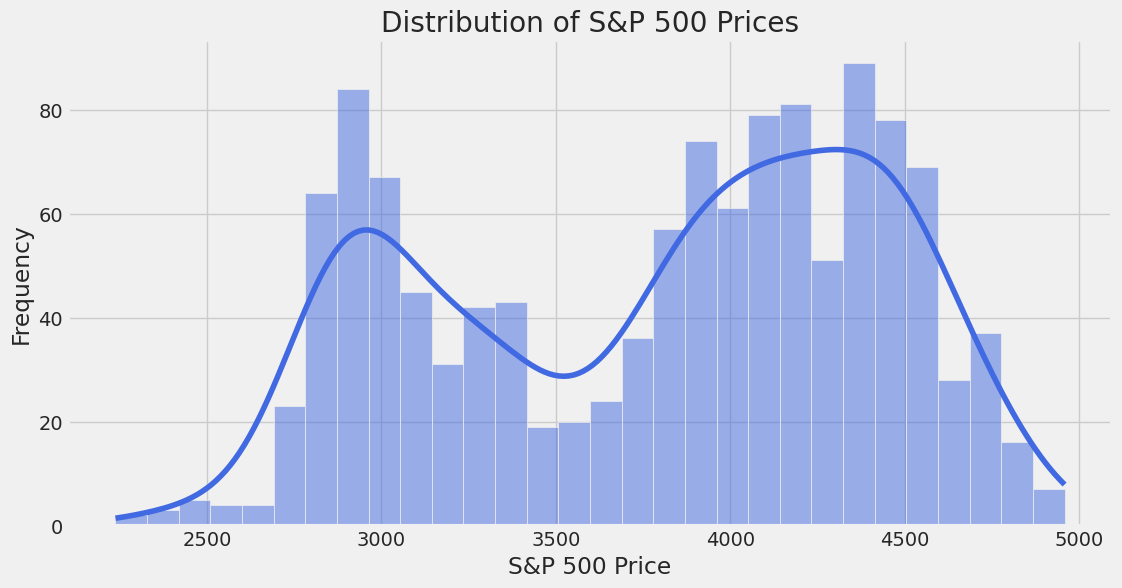

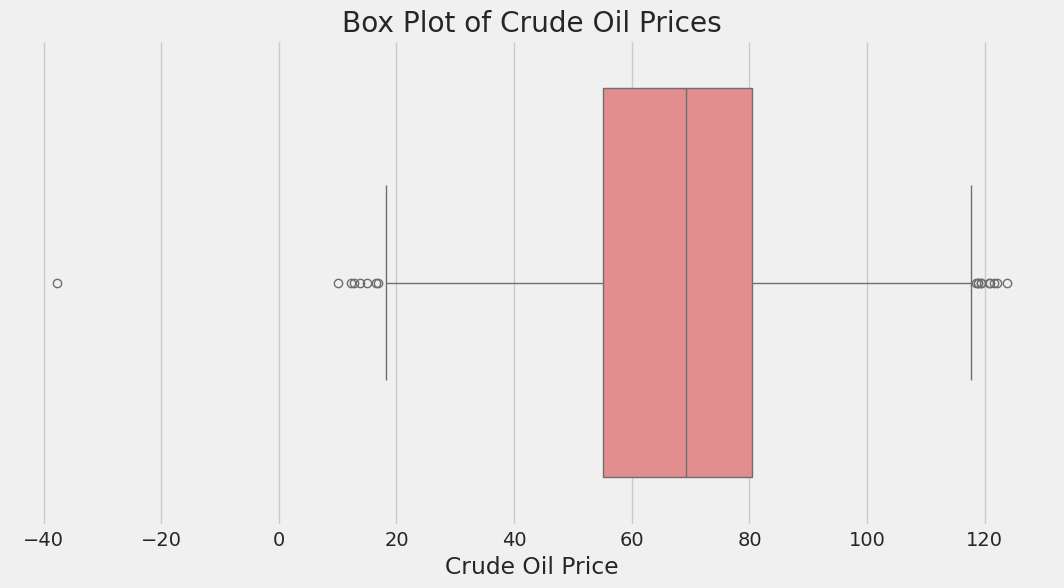

/tmp/ipython-input-1004631053.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


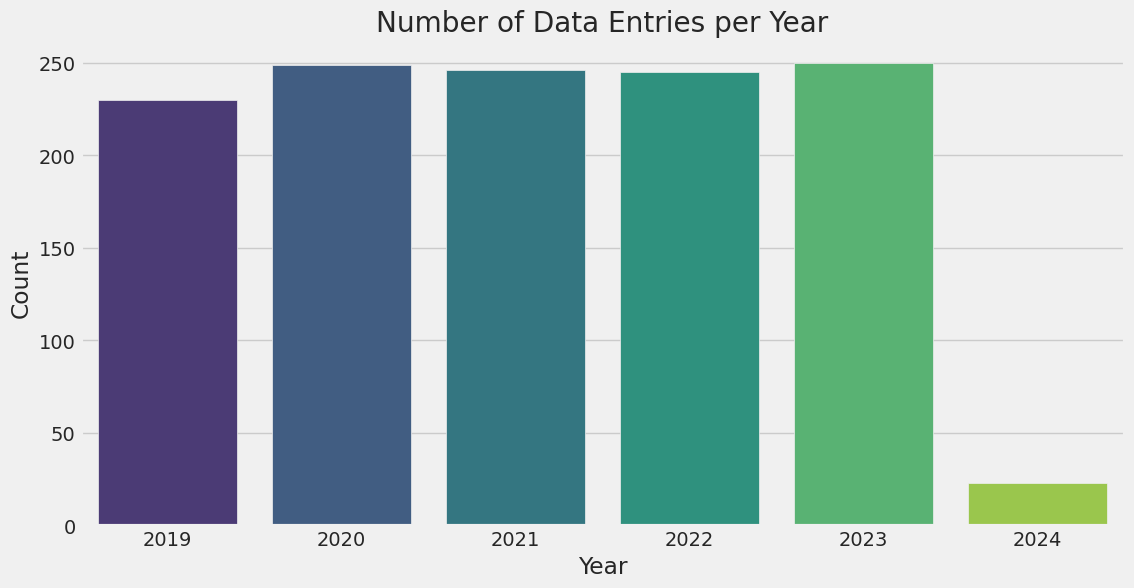


Generating bivariate visualizations...


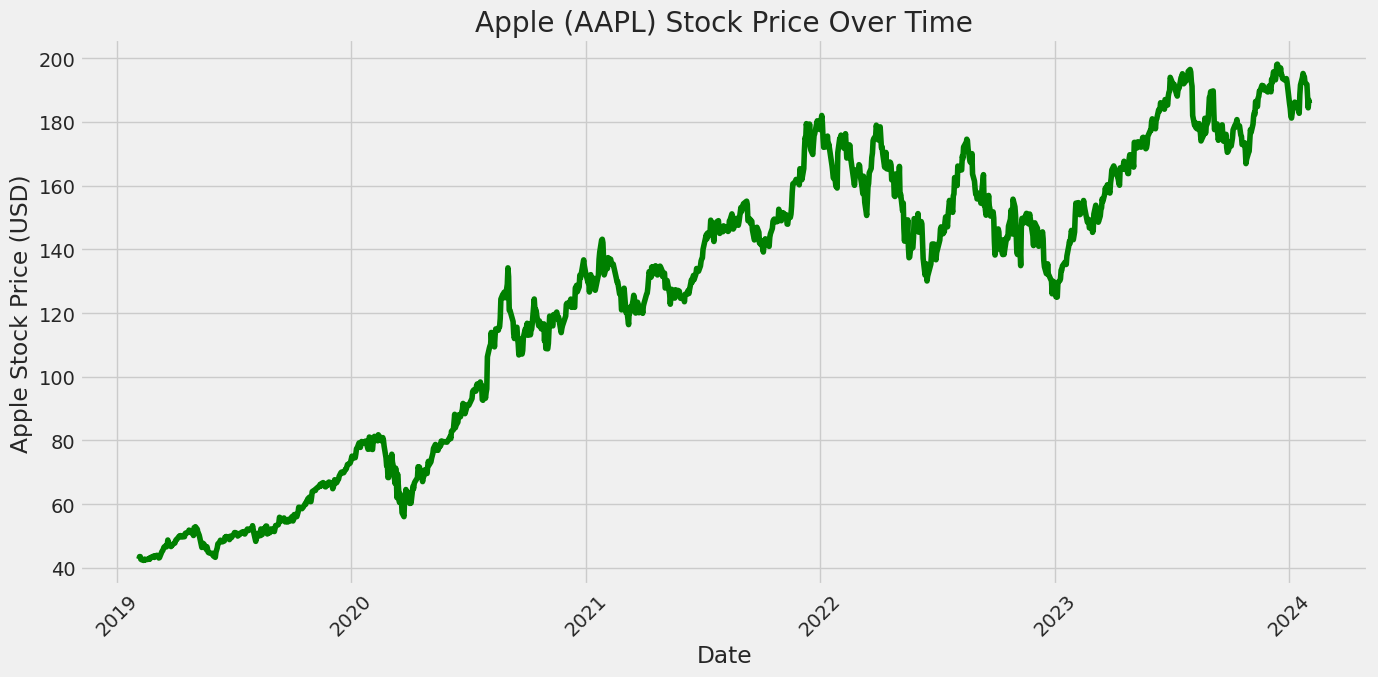

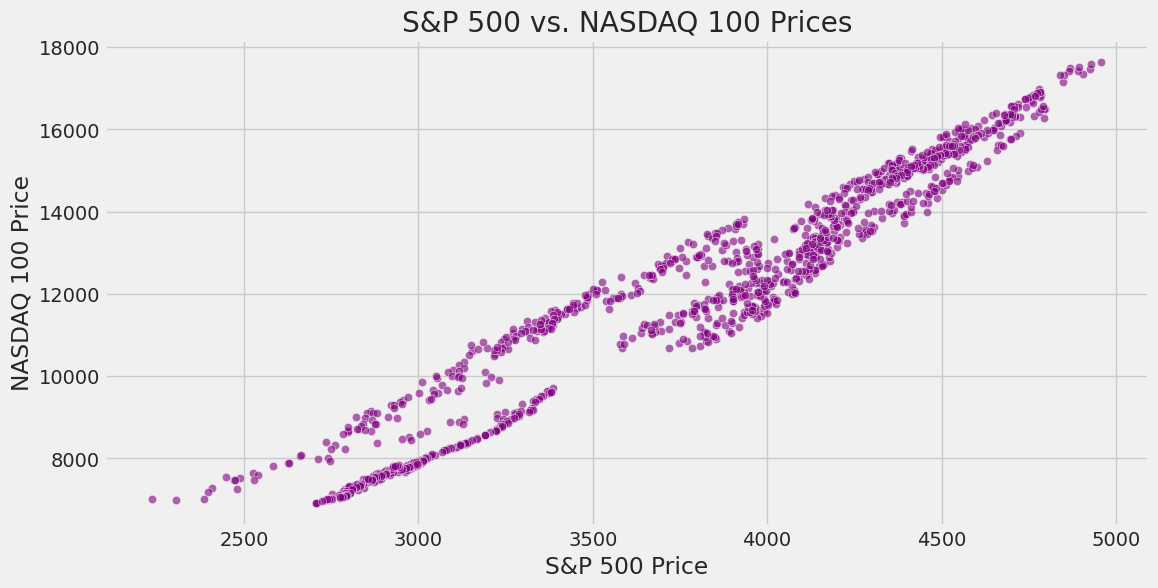

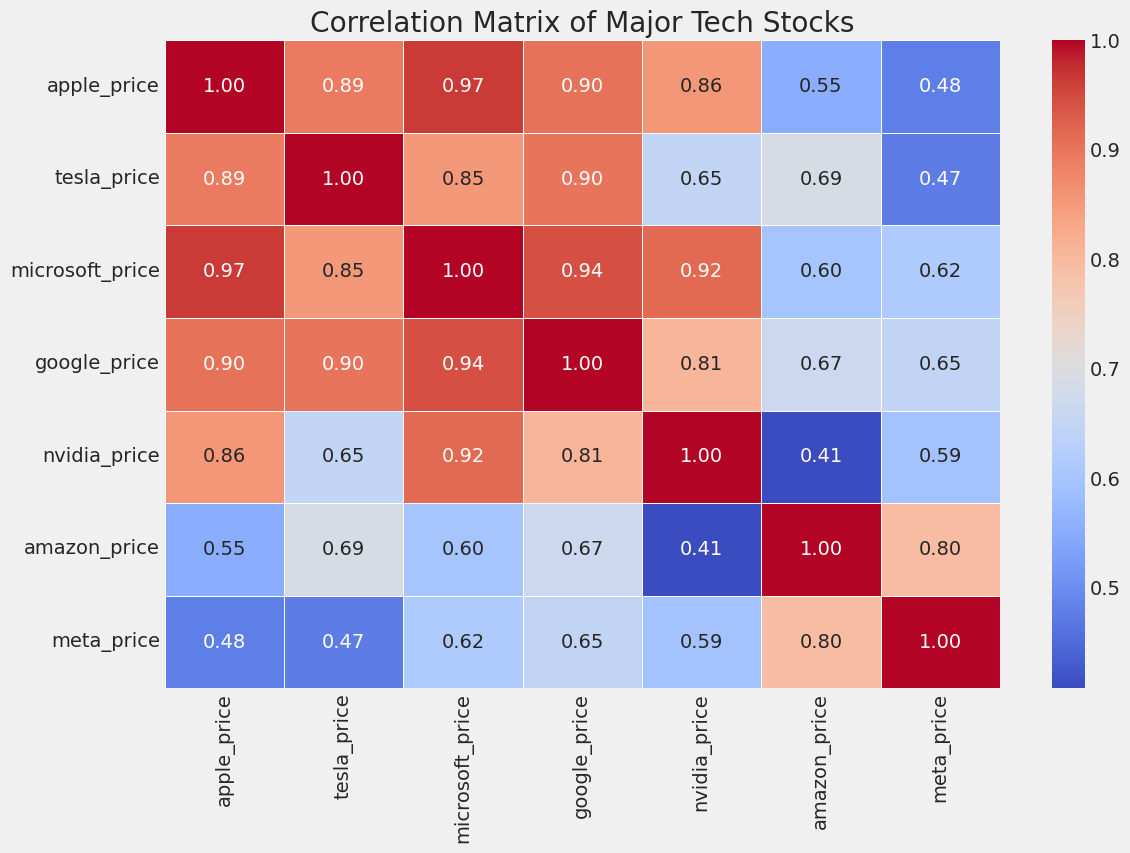


Generating pair plot (this might take a moment)...


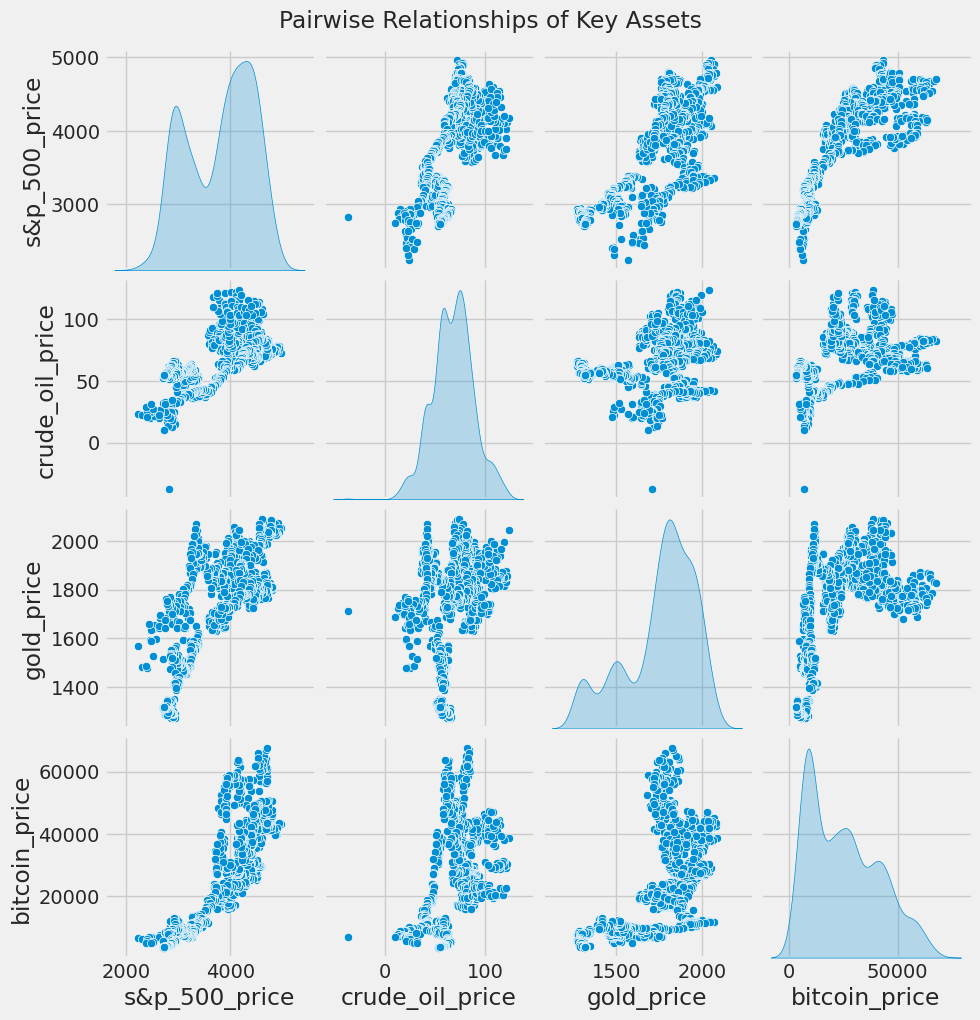


All visualizations have been generated.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Make sure the 'cleaned_stock_market_data.csv' file is in the same directory as this script.
try:
    df = pd.read_csv('/content/cleaned_stock_market_data.csv', parse_dates=['date'])
except FileNotFoundError:
    print("Error: 'cleaned_stock_market_data.csv' not found.")
    print("Please make sure the dataset file is in the correct directory.")
    exit()

# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


# --- 1. Univariate Visualizations (Understanding single variables) ---

print("Generating univariate visualizations...")

# a) Distribution of S&P 500 Prices (Histogram)
# A histogram shows the frequency distribution of a single numerical variable.
# It helps us understand the central tendency, spread, and shape of the data.
plt.figure(figsize=(12, 6))
sns.histplot(df['s&p_500_price'], kde=True, bins=30, color='royalblue')
plt.title('Distribution of S&P 500 Prices')
plt.xlabel('S&P 500 Price')
plt.ylabel('Frequency')
plt.show()

# b) Distribution of Crude Oil Prices (Box Plot)
# A box plot is excellent for visualizing the distribution of data and identifying outliers.
# It shows the median, quartiles, and potential outliers.
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['crude_oil_price'], color='lightcoral')
plt.title('Box Plot of Crude Oil Prices')
plt.xlabel('Crude Oil Price')
plt.show()

# c) Number of Data Points per Year (Count Plot)
# A count plot shows the number of occurrences of each category in a categorical variable.
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Data Entries per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# --- 2. Bivariate Visualizations (Understanding relationships between two variables) ---

print("\nGenerating bivariate visualizations...")

# a) Apple Stock Price Over Time (Line Plot)
# A line plot is perfect for showing the trend of a variable over time.
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='apple_price', data=df, color='green')
plt.title('Apple (AAPL) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b) Relationship between S&P 500 and NASDAQ 100 (Scatter Plot)
# A scatter plot helps visualize the relationship and correlation between two numerical variables.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='s&p_500_price', y='nasdaq_100_price', data=df, alpha=0.6, color='purple')
plt.title('S&P 500 vs. NASDAQ 100 Prices')
plt.xlabel('S&P 500 Price')
plt.ylabel('NASDAQ 100 Price')
plt.show()

# c) Correlation Matrix of Major Tech Stocks (Heatmap)
# A heatmap is a great way to visualize the correlation matrix of multiple variables.
# It helps to quickly identify which variables are highly correlated.
correlation_columns = ['apple_price', 'tesla_price', 'microsoft_price', 'google_price', 'nvidia_price', 'amazon_price', 'meta_price']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Major Tech Stocks')
plt.show()

# d) Pairwise Relationships of Key Assets (Pair Plot)
# A pair plot provides a matrix of scatter plots for pairwise relationships
# and histograms for the distribution of each variable. It's a great way to get a quick overview.
print("\nGenerating pair plot (this might take a moment)...")
pairplot_cols = ['s&p_500_price', 'crude_oil_price', 'gold_price', 'bitcoin_price']
sns.pairplot(df[pairplot_cols].dropna(), kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Assets', y=1.02)
plt.show()

print("\nAll visualizations have been generated.")